# Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation

warnings.filterwarnings(action='ignore')

# Read dataset files

In [2]:

train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')
print(train_data.shape)
train_data.head()


(114, 11)


,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


# Check missing data

In [4]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col


print("train data check")
missing_col = check_missing_col(train_data)
print("test data check")
check_missing_col(pd.read_csv('./data/test.csv'))

train data check
결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
test data check
결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 6개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 9개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 8개의 결측치가 존재합니다.


[['Sex', dtype('O')],
 ['Delta 15 N (o/oo)', dtype('float64')],
 ['Delta 13 C (o/oo)', dtype('float64')]]

# Missing data
- missing data columns : 
     - Sex
     - Delta 15 N (o/oo)
     - Delta 13 C (o/oo)
- missing case 1 : 'Sex'
- missing case 2 : 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'
- missing case 3 : 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'

# How to process
- sex : set MALE
- 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)' : set mean value of all train data

# To do
- Sex : predict with
    - Species: 펭귄의 종을 나타내는 문자열
    - Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
    - Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
    - Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
    - Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
    - Flipper Length (mm) : 펭귄의 팔(날개) 길이
- Delta 15 N (o/oo), Delta 13 C (o/oo) : predict with
    - Sex : 펭귄의 성별
    - Species : 펭귄의 종을 나타내는 문자열
    - Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
    - Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
    - Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
    - Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
    - Flipper Length (mm) : 펭귄의 팔(날개) 길이

In [6]:
# to do
def processing_missing_data(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        temp[temp['col'].isna()][col] = 'MALE'


    for col, dtype in missing_col:
        if dtype == 'O':
            # 카테고리형 feature가 결측치인 경우 해당 행들을 삭제해 주었습니다.
            temp = temp.dropna(subset=[col])
        elif dtype == int or dtype == float:
            # 수치형 feature가 결측치인 경우 평균값을 채워주었습니다.
            temp.loc[:,col] = temp[col].fillna(temp[col].mean())
    return temp

data = processing_missing_data(train_data, missing_col)

KeyError: 'col'

# Features of Label encoding
- Species: 펭귄의 종을 나타내는 문자열
  - Gentoo penguin (Pygoscelis papua)
  - Chinstrap penguin (Pygoscelis antarctica)
  - Adelie Penguin (Pygoscelis adeliae)
- Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
  - Biscoe
  - Dream
  - Torgersen
- Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
  - Yes : Full Clutch, 펭귄 둥지의 알이 2개
  - No : Not Full Clutch, 펭귄 둥지의 알이 2개가 아님
- Sex : 펭귄의 성별
  - MALE
  - FEMALE

# Label encoding to one-hot encoding

In [7]:
train_x = input_data.drop(['id', 'Body Mass (g)'], axis=1)
train_x = pd.get_dummies(train_x, columns= ['Species', 'Island', 'Clutch Completion', 'Sex'])
print(train_x.shape)
print(train_x)

train_y = input_data[['Body Mass (g)']]
print(train_y.shape)
print(train_y.head())

(114, 15)
     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  50.0               15.3                  220   
1                  49.5               19.0                  200   
2                  45.1               14.4                  210   
3                  44.5               14.7                  214   
4                  49.6               16.0                  225   
..                  ...                ...                  ...   
109                36.6               17.8                  185   
110                39.2               18.6                  190   
111                43.2               18.5                  192   
112                46.9               16.6                  192   
113                50.8               17.3                  228   

     Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0              8.30515          -25.19017   
1              9.63074          -24.34684   
2              8.51951          -27.01854   
3    

In [104]:
model = Sequential()
model.add(Dense(64, input_dim=train_x.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(train_x, train_y, epochs=500, batch_size=64)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 64)                1984      
_________________________________________________________________
dense_53 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 65        
Total params: 6,209
Trainable params: 6,209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 1s 21ms/step - loss: 6.4636 - accuracy: 0.5062
Epoch 2/500
3/3 [==============================] - 0s 19ms/step - loss: 2.7603 - accuracy: 0.5514
Epoch 3/500
3/3 [==============================] - 0s 4ms/step - loss: 2.4510 - accuracy: 0.5206
Epoch 4/500
3/3 [==============================] - 0s 14ms/step - loss: 1.3079 - accurac

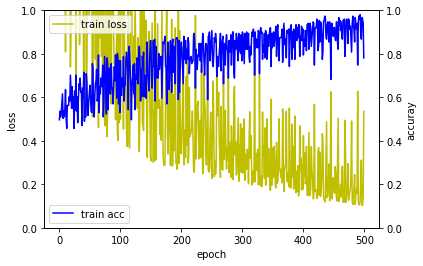

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [106]:
#모델 평가하기
loss_and_metrics = model.evaluate(train_x, train_y, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

5/5 [==============================] - 0s 8ms/step - loss: 0.0988 - accuracy: 0.9669
loss_and_metrics : [0.09880542010068893, 0.9668874144554138]


In [122]:
test_data = pd.read_csv('./data/test.csv')
result = test_data['id']
test_data = test_data.drop(['id'], axis=1)
test_data = pd.get_dummies(test_data, columns= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
print(test_data.shape)
print(test_data.head())
print(train_x.columns)
print(test_data.columns)
target = model.predict(np.array(test_data))

0        1
1        2
2        3
3        4
4        5
      ... 
147    148
148    149
149    150
150    151
151    152
Name: id, Length: 152, dtype: int64
(152, 30)
   age  trestbps  chol  thalach  oldpeak  sex_0  sex_1  cp_0  cp_1  cp_2  ...  \
0   57       150   276      112      0.6      0      1     1     0     0  ...   
1   59       170   288      159      0.2      0      1     0     0     0  ...   
2   57       150   126      173      0.2      0      1     0     0     1  ...   
3   56       134   409      150      1.9      1      0     1     0     0  ...   
4   71       110   265      130      0.0      1      0     0     0     1  ...   

   slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_3  
0        0     0     1     0     0     0       0       1       0       0  
1        0     1     0     0     0     0       0       0       0       1  
2        1     0     1     0     0     0       0       0       0       1  
3        0     0     0     1     0     0      

In [121]:
for i in range(result.shape[0]):
    if(target[i]>0.5):
        target[i]=1
    else:
        target[i]=0
result['target'] = target
result.coumns = ['id', 'target']
print(result.head())

0    1
1    2
2    3
3    4
4    5
Name: id, dtype: object
